# K-means clustering
#Andres Benjamin Antelis Moreno A01637683
The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [4]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


In [2]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [117]:
# Dataset url
url = "/content/drive/MyDrive/!Tec stuff/!Uni/Semestre 2/Semana Tec1/TC1002S/NotebooksProfessor/SyntheticData4Clustering_X.csv"

# Load the dataset
df  = pd.read_csv(url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [ ]:
# Print the dataframe
df.head()

,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334


In [ ]:
# get the number of observations and variables

df.shape

(1024, 6)

2. Drop rows with any missing values


In [ ]:
# Drop rows with NaN values if existing
df.notnull().sum()

# Print the new shape
df.shape

(1024, 6)

3. Scatterplot




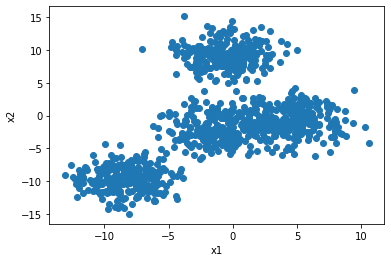

In [ ]:
# Scatterplot of x1 and x2
plt.scatter(df.x1,df.x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

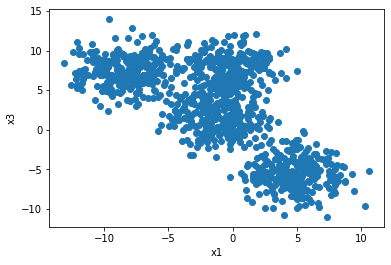

In [ ]:
# Scatterplot of x1 and x3
plt.scatter(df.x1,df.x3)
plt.xlabel('x1')
plt.ylabel('x3')
plt.show()

Difficult to plot independetly all combinations, let's use pairplot

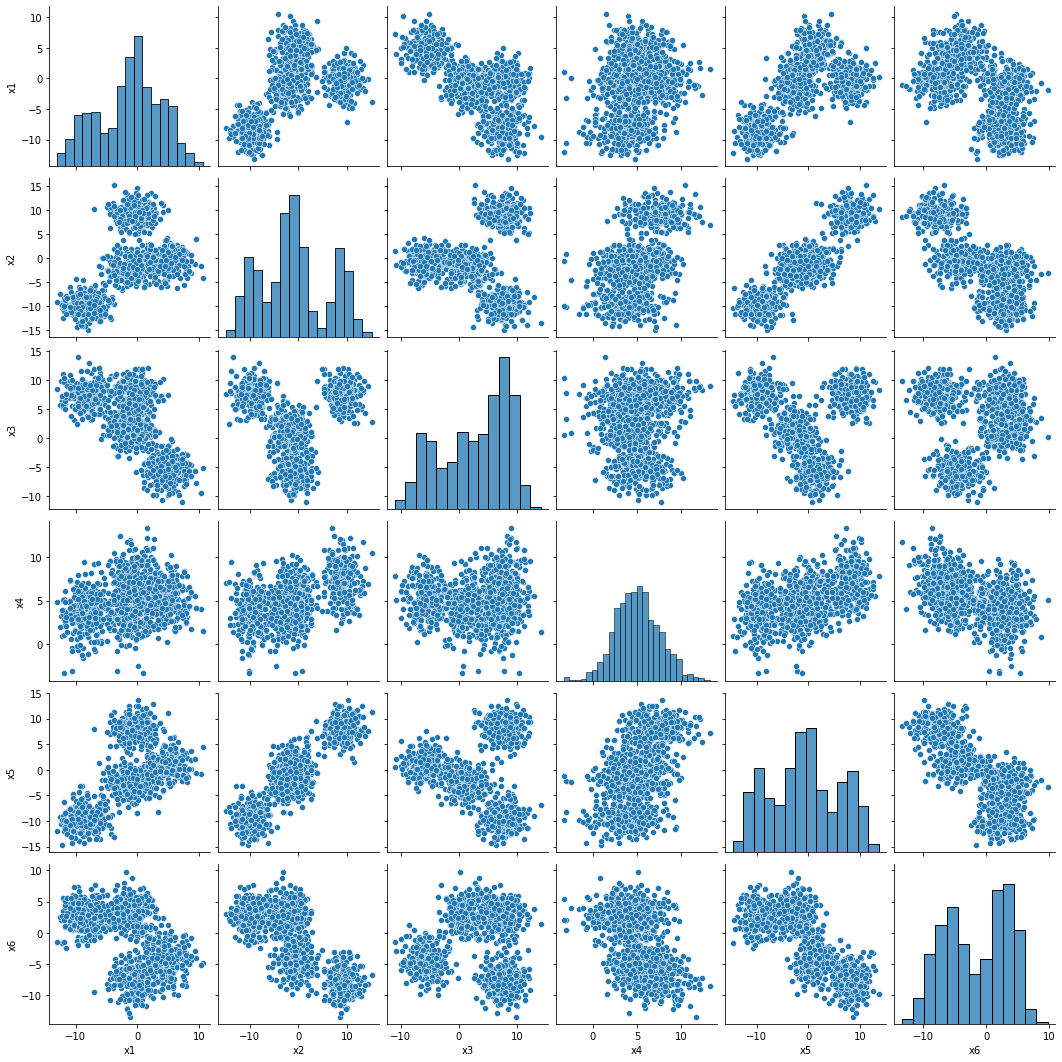

In [ ]:
# Pairplot: Scatterplot of all variables
sns.pairplot(df)
# to show
plt.show()

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [ ]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  =  3
km  = KMeans(n_clusters=K,n_init="auto")


# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)



# Print estimated cluster of each point in the dataset
yestimated

array([0, 2, 2, ..., 2, 0, 0], dtype=int32)

In [ ]:
# Add a new column to the dataset with the cluster information
df.insert(6, "yestimated", yestimated, True)

df.head()

,x1,x2,x3,x4,x5,x6,yestimated
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978,0
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122,2
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397,2
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542,2
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334,0


In [ ]:
# Laber of the estimated clusters

df.yestimated.unique()

array([0, 2, 1], dtype=int32)

In [ ]:
# Cluster centroides

km.cluster_centers_


array([[ 1.85043266, -1.34592151, -2.11883656,  4.5718429 , -0.79519547,
        -0.55114018],
       [-8.3650671 , -9.59550917,  7.40711607,  3.77249056, -9.44226128,
         2.67666451],
       [-0.44229417,  9.13121533,  7.61409814,  7.22984721,  8.13001382,
        -7.6264221 ]])

In [ ]:
# Sum of squared error (sse) of the final model

km.inertia_


44295.1263266536

In [ ]:
# The number of iterations required to converge

km.n_iter_

3

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

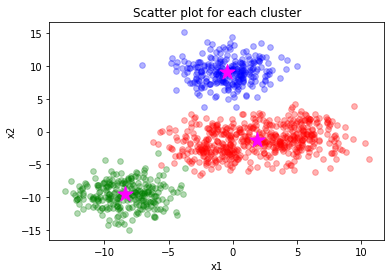

In [ ]:
# Get a dataframe with the data of each clsuter
df1=df[df.yestimated==0]
df2=df[df.yestimated==1]
df3=df[df.yestimated==2]
# Scatter plot of each cluster
plt.scatter(df1.x1,df1.x2,label="cluster 0", c="r",s=32,alpha=0.3)
plt.scatter(df2.x1,df2.x2,label="cluster 0", c="g",s=32,alpha=0.3)
plt.scatter(df3.x1,df3.x2,label="cluster 0", c="b",s=32,alpha=0.3)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title("Scatter plot for each cluster")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

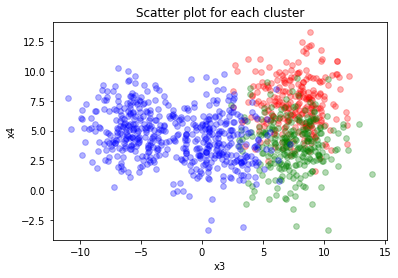

In [128]:
# Get a dataframe with the data of each clsuter
df1=df[df.yestimated==0]
df2=df[df.yestimated==1]
df3=df[df.yestimated==2]
# Scatter plot of each cluster
plt.scatter(df1.x3,df1.x4,label="cluster 0", c="r",s=32,alpha=0.3)
plt.scatter(df2.x3,df2.x4,label="cluster 0", c="g",s=32,alpha=0.3)
plt.scatter(df3.x3,df3.x4,label="cluster 0", c="b",s=32,alpha=0.3)

plt.title("Scatter plot for each cluster")
plt.xlabel("x3")
plt.ylabel("x4")
plt.show()

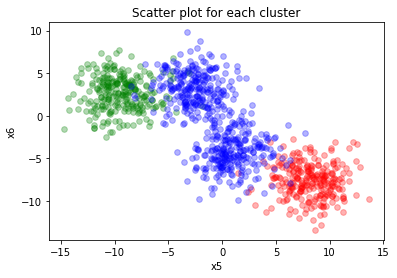

In [129]:
# Get a dataframe with the data of each clsuter
df1=df[df.yestimated==0]
df2=df[df.yestimated==1]
df3=df[df.yestimated==2]
# Scatter plot of each cluster
plt.scatter(df1.x5,df1.x6,label="cluster 0", c="r",s=32,alpha=0.3)
plt.scatter(df2.x5,df2.x6,label="cluster 0", c="g",s=32,alpha=0.3)
plt.scatter(df3.x5,df3.x6,label="cluster 0", c="b",s=32,alpha=0.3)

plt.title("Scatter plot for each cluster")
plt.xlabel("x5")
plt.ylabel("x6")
plt.show()

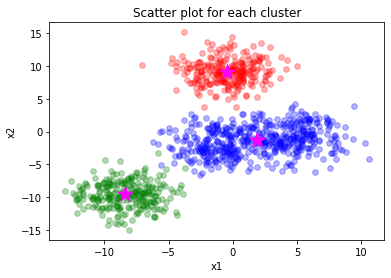

In [124]:
df  = pd.read_csv(url)
K  =  3
km  = KMeans(n_clusters=K,n_init="auto")
yestimated = km.fit_predict(df)
df.insert(6, "yestimated", yestimated, True)

# Get a dataframe with the data of each clsuter
df1=df[df.yestimated==0]
df2=df[df.yestimated==1]
df3=df[df.yestimated==2]
df4=df[df.yestimated==3]
df5=df[df.yestimated==4]
df6=df[df.yestimated==5]

# Scatter plot of each cluster
plt.scatter(df1.x1,df1.x2,label="cluster 0", c="r",s=32,alpha=0.3)
plt.scatter(df2.x1,df2.x2,label="cluster 0", c="g",s=32,alpha=0.3)
plt.scatter(df3.x1,df3.x2,label="cluster 0", c="b",s=32,alpha=0.3)
plt.scatter(df4.x1,df4.x2,label="cluster 0", c="b",s=32,alpha=0.3)
plt.scatter(df5.x1,df5.x2,label="cluster 0", c="b",s=32,alpha=0.3)
plt.scatter(df6.x1,df6.x2,label="cluster 0", c="b",s=32,alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title("Scatter plot for each cluster")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [ ]:
# Intialize a list to hold sum of squared error (sse)
sse=[]

# Define values of k
k_rng=range(1,10)

# For each k
for k in k_rng:
  #creating the model
  km=KMeans(n_clusters=k,n_init="auto")
  #Do k means clustering
  km.fit_predict(df[["x1","x2"]])
  #saving for each k sse
  sse.append(km.inertia_)

Text(0, 0.5, 'sse')

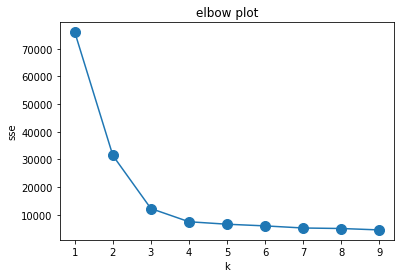

In [ ]:
# Plot sse versus k
plt.plot(k_rng,sse,"o-",markersize=10)
plt.title("elbow plot")
plt.xlabel("k")
plt.ylabel("sse")


Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: 

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics


In [97]:
# Dataset url
url2 = "/content/drive/MyDrive/!Tec stuff/!Uni/Semestre 2/Semana Tec1/TC1002S/NotebooksProfessor/datasets/iris/irisgood.csv"

# Load the dataset
db  = pd.read_csv(url2)

In [98]:
db.head()

,sepalL,sepalW,petalL,petalW,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
db.shape

(150, 5)

In [100]:
# Drop rows with NaN values if existing
db.notnull().sum()

# Print the new shape
#db.shape

sepalL    150
sepalW    150
petalL    150
petalW    150
class     150
dtype: int64

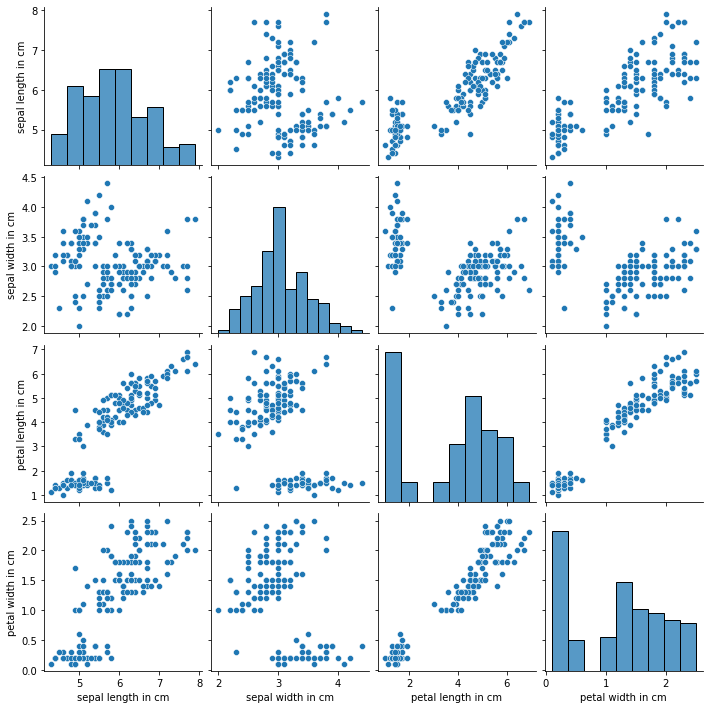

In [ ]:
# Pairplot: Scatterplot of all variables
sns.pairplot(db)
# to show
plt.show()

In [101]:
# Eliminate Column because it is a string
db.drop("class", axis=1, inplace = True)

db.head()

,sepalL,sepalW,petalL,petalW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [102]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  =  2
km  = KMeans(n_clusters=K,n_init="auto")


# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(db)



# Print estimated cluster of each point in the dataset
yestimated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [103]:
db.insert(4, "yestimated", yestimated, True)

db.head()


,sepalL,sepalW,petalL,petalW,yestimated
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [104]:

db.yestimated.unique()


array([0, 1], dtype=int32)

In [105]:

km.cluster_centers_


array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

In [106]:

km.inertia_


152.3479517603579

In [107]:

km.n_iter_

2

In [108]:
db.head()

,sepalL,sepalW,petalL,petalW,yestimated
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


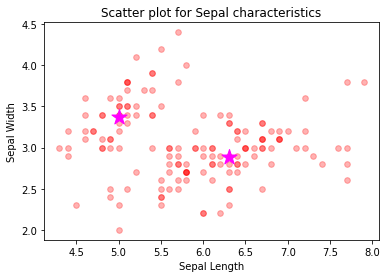

In [109]:
# Get a dataframe with the data of each clsuter
db1=db[db.yestimated==0]
db2=db[db.yestimated==1]
#db3=db[db.yestimated==2]

# Scatter plot of each clustera
plt.scatter(db1.sepalL,db1.sepalW,label="Cluster 0", c="r", marker="o",s=32,alpha=0.3)
plt.scatter(db2.sepalL,db2.sepalW,label="Cluster 0", c="r", marker="o",s=32,alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title("Scatter plot for Sepal characteristics")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [112]:
# Intialize a list to hold sum of squared error (sse)
sse=[]

# Define values of k
k_rng=range(1,10)

# For each k
for k in k_rng:
  #creating the model
  km=KMeans(n_clusters=k,n_init="auto")
  #Do k means clustering
  km.fit_predict(db[["sepalL","sepalW"]])
  #saving for each k sse
  sse.append(km.inertia_)

Text(0, 0.5, 'sse')

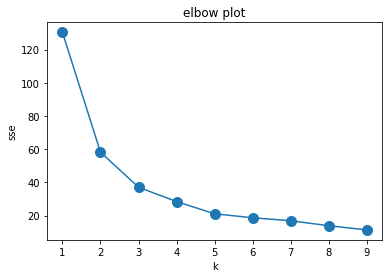

In [113]:
# Plot sse versus k
plt.plot(k_rng,sse,"o-",markersize=10)
plt.title("elbow plot")
plt.xlabel("k")
plt.ylabel("sse")

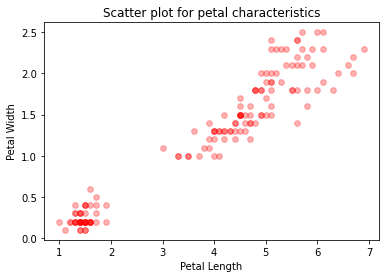

In [110]:
# Get a dataframe with the data of each clsuter
db1=db[db.yestimated==0]
db2=db[db.yestimated==1]
#db3=db[db.yestimated==2]

# Scatter plot of each clustera
plt.scatter(db1.petalL,db1.petalW,label="Cluster 0", c="r", marker="o",s=32,alpha=0.3)
plt.scatter(db2.petalL,db2.petalW,label="Cluster 0", c="r", marker="o",s=32,alpha=0.3)

#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title("Scatter plot for petal characteristics")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [114]:
# Intialize a list to hold sum of squared error (sse)
sse=[]

# Define values of k
k_rng=range(1,10)

# For each k
for k in k_rng:
  #creating the model
  km=KMeans(n_clusters=k,n_init="auto")
  #Do k means clustering
  km.fit_predict(db[["petalL","petalW"]])
  #saving for each k sse
  sse.append(km.inertia_)

Text(0, 0.5, 'sse')

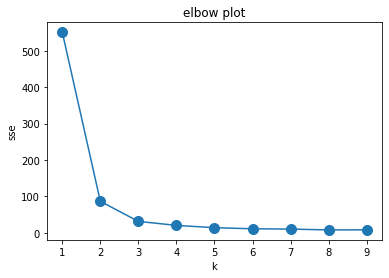

In [115]:
# Plot sse versus k
plt.plot(k_rng,sse,"o-",markersize=10)
plt.title("elbow plot")
plt.xlabel("k")
plt.ylabel("sse")